# TECHNICAL OVERVIEW OF LATTICE

Chapter gives broad overview of lattice, briefly
describing the most important features shared by
all high-level functions.

### BASIC USAGE p. 13

All high level functions in lattice are generic FUNs
And can write suitable methods for particular classes
So can adapt generic functions through the arguments
supplied to that function

Most such methods are simple wrappers to the 'formula'
method (i.e. the function that gets executed when the
first argument is a 'formula' object)

### The Trellis Formula    p. 13

Formulas are primary means of defining the structure 
of a lattice display. Typical Trellis formula looks
like: y ~ x | a * b

Tilde is what makes a 'formula' object
Vertical bar '|' important, denotes conditioning.
'Conditioning variables' to right of bar.
'Primary variables' to left of bar.

Trellis formula must contain at least one primary var
Conditioning var is optional

### Data Argument

Use of formula allows one to separately specify an
object containing variables referenced in object

Don't have to use 'attach' as much

Data argument is in second position in list of args
in all high level lattice functions, so often is
named in a call

### Conditioning

Where Trellis formula has no conditioning variables:
histogram(~ x) similar to hist(x) in base;
xyplot(y ~ x) similar to plot(x, y) or plot(y ~ x)

Trellis more interesting with conditioning variables

Conditioning variables usually categorical...factors
But can also be shingles which use continuous vars
for conditioning

Factors have 'levels'; unique combination of levels
determines a "packet" which provides the data for
a single 'panel' in Trellis display

Trellis display consists of set of panels laid out
in array of columns, rows and pages.

Critical 'trick' is to choose appropriate layout.
Lattice tries to make default choice as useful as
possible.

### SHINGLES p. 15

Lattice has a unique approach for using a numeric
variable for conditioning by treating each unique value
as a level. Is default behavior in lattice.

Another approach is to convert a continuous variate into
an ordinal categorical variable by partitioning its range
into two or more non-overlapping intervals, replacing each
value by only an indicator of the interval to which it
belongs.

This 'discretization' can also be performed using cut() function.

'Shingles' also allow the discrete intervals to overlap.
Each interval is now considered a "level" of the shingle.

This means that the 'level' of a particular observation is
is no longer necessarily unique, it can belong to 2 categories.

If using 'shingled' variable as a 'conditioning' variable,
it means simply assigning the overlapping observations to
more than one packet.

### DIMENSION AND PHYSICAL LAYOUT   p. 16

Multipanel conditioning is an extended form of cross-tabulation.
Confers the concepts of 'dimensions' to trellis objects.

Consider this graph, uses data from split-plot experiment:
Oat yield ~ 3 oat varieties, 4 nitrogen concentrations
within six blocks.

In [1]:
library(lattice)

Produces trellis display of Oats data:

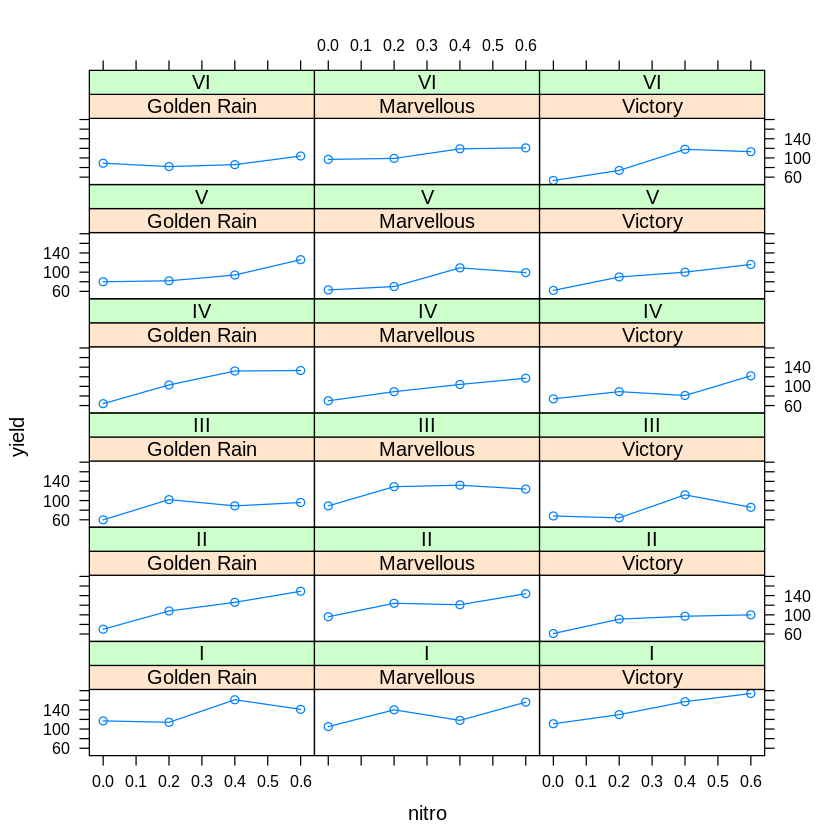

In [2]:
data(Oats, package = "MEMSS")
tp1.oats <- 
    xyplot(yield ~ nitro | Variety + Block, data = Oats, type = 'o')
print(tp1.oats)

Plot partitions are "PANELS" - protottpical of trellis objects.

Typical usage of xyplot(): gives scatter plot of yield against
nitrogen concentration in each panel.

Are 2 conditioning variables (dimensions): (1) Variety (3 levels);
and (2) Block (6 levels)

In [3]:
dim(tp1.oats) # see the 3  x  6 dimensions in statements returned
dimnames(tp1.oats)

[1] 3 6

$Variety
[1] "Golden Rain" "Marvellous"  "Victory"    

$Block
[1] "I"   "II"  "III" "IV"  "V"   "VI"

These properties are echoed by cross-tab defining the conditioning:

In [4]:
xtabs(~Variety + Block, data = Oats)

             Block
Variety       I II III IV V VI
  Golden Rain 4  4   4  4 4  4
  Marvellous  4  4   4  4 4  4
  Victory     4  4   4  4 4  4

This cross tab is printed when trellis object is summarized:

In [5]:
summary(tp1.oats)


Call:
xyplot(yield ~ nitro | Variety + Block, data = Oats, type = "o")

Number of observations:
             Block
Variety       I II III IV V VI
  Golden Rain 4  4   4  4 4  4
  Marvellous  4  4   4  4 4  4
  Victory     4  4   4  4 4  4

Note bottom row of plot: Is a trellis display of a subset of a
trellis object. tp1.oats object is a matrix-like trellis object:

In [6]:
summary(tp1.oats[, 1])


Call:
xyplot(yield ~ nitro | Variety + Block, data = Oats, type = "o", 
    index.cond = new.levs)

Number of observations:
             Block
Variety       I
  Golden Rain 4
  Marvellous  4
  Victory     4

Can segment off a subset to plot:

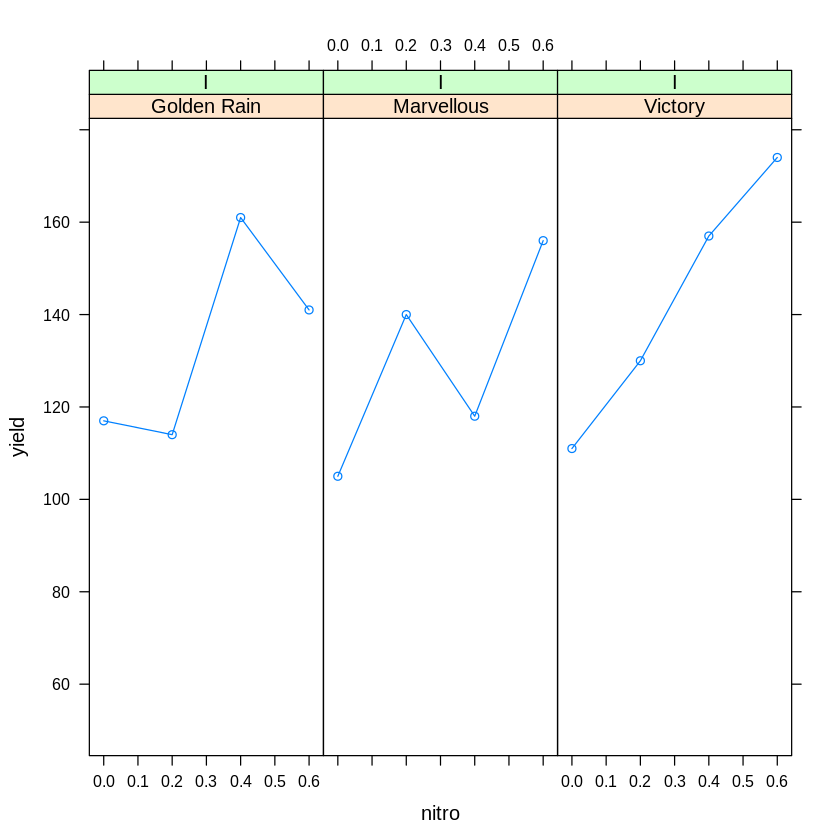

In [7]:
print(tp1.oats[, 1])

### ASPECT RATIO   p. 19

Aspect ratio of a panel is the ratio of physical height and width.
Choice of aspect ratio critical in effectiveness of display.

45 degree "banking rule": can see changes best when orientation
of line segments is close to 45 degrees. Implemented when argument
(1) aspect = "xy". Can also make aspect argument an explicit numeric
(2) ratio. (3) aspect = "iso" indicates that number of units per cm
(ie. physical distance = distance scale) is same for both axes.
(3) appropriate when both scales have same units (spatial).

### LAYOUT p. 20

Good choice of layout should take aspect ratio into account.
Here we 'update' previous plot with 45 degree banking rule.
Resulting default display is not effective:

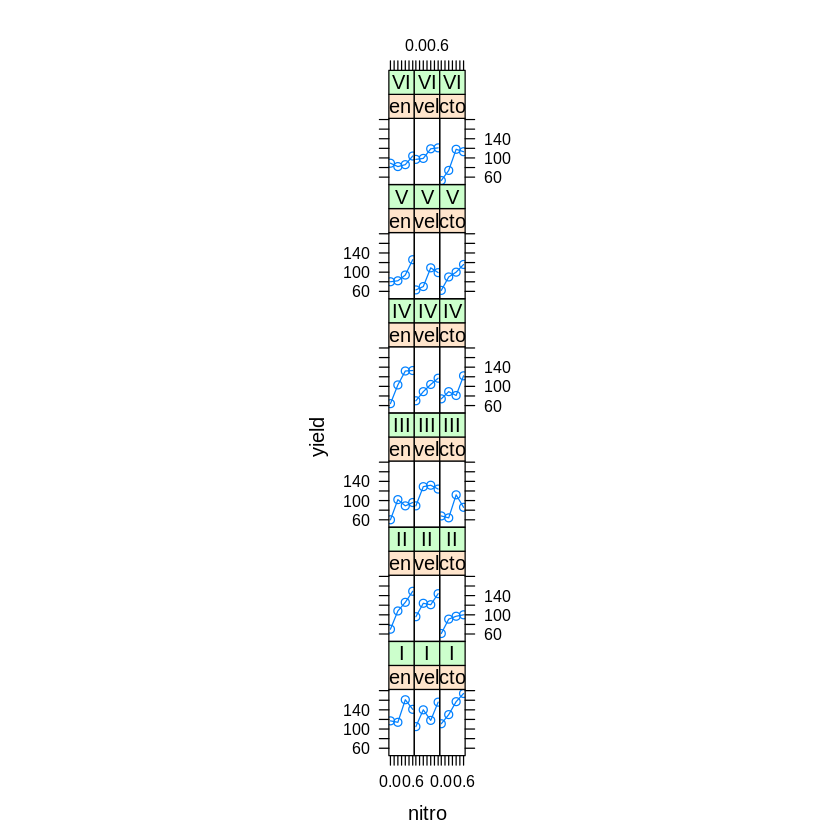

In [8]:
update(tp1.oats, aspect="xy")

Trellis display is several panels arranged in rectangular array.
layout argument determines this arrangement.
numeric vector panel for layout argument produces number of
columns, rows and pages in a multipanel display.

can restrict n of pages by not specifying 3rd element. Then it is
automatically chosen to accommodate all panels

Panels are drawn using default cartesian coordinate system. Panels
drawn starting from lower left corner to right and then up (using
default as.table = FALSE setting in high level lattice call).

With 2 or more conditioning variables, layout defaults to:
columns = number of levels of 1st conditioning variable;
rows = number of levels of 2nd conditioning variable.

Is why last plot looks like it does, can fix by switching order
of conditioning variables, for example:

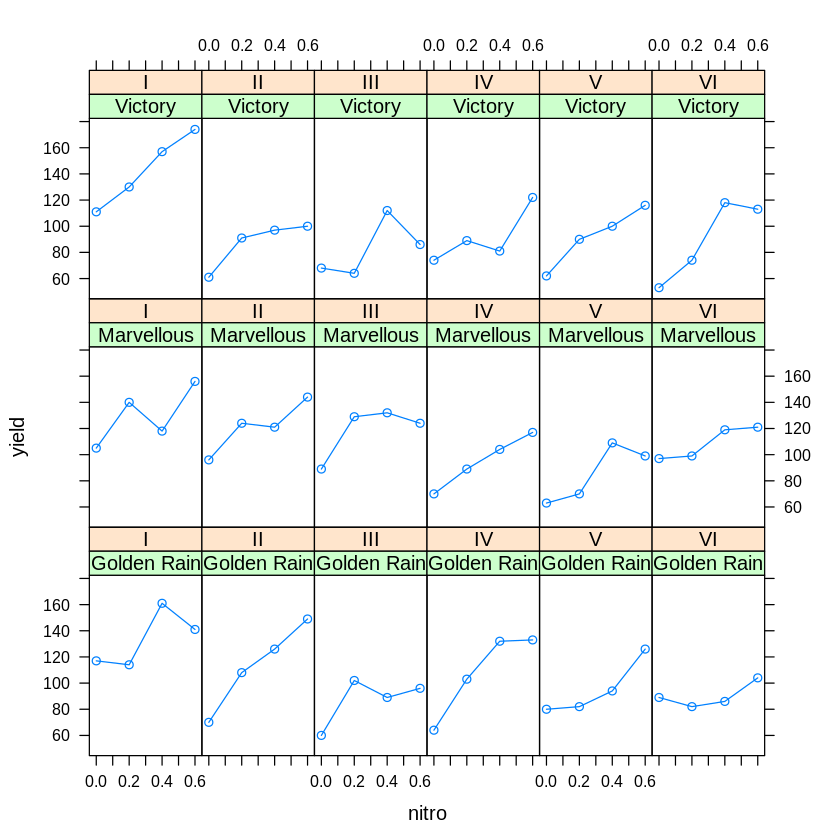

In [9]:
t(tp1.oats)

Or can use special form of layout where 0 as first element makes
2nd element interpreted as total number of panels per page such
that R chooses the exact (unconstrained) layout. R
does this by considering the aspect ratio and the
device dimensions to maximize the space occupied by
each panel:

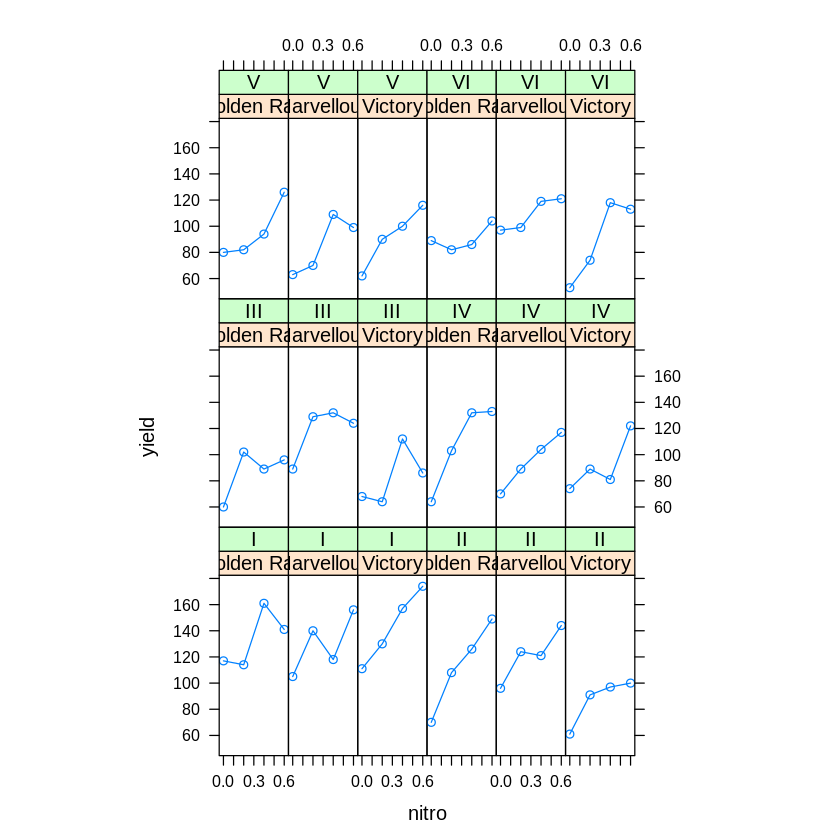

In [10]:
update(tp1.oats, aspect = "xy",
       layout = c(0, 18))

Here we have updated tp1.oats to put spacing between
appropriate columns and rows, separating panels into
groups of blocks using the between argument:

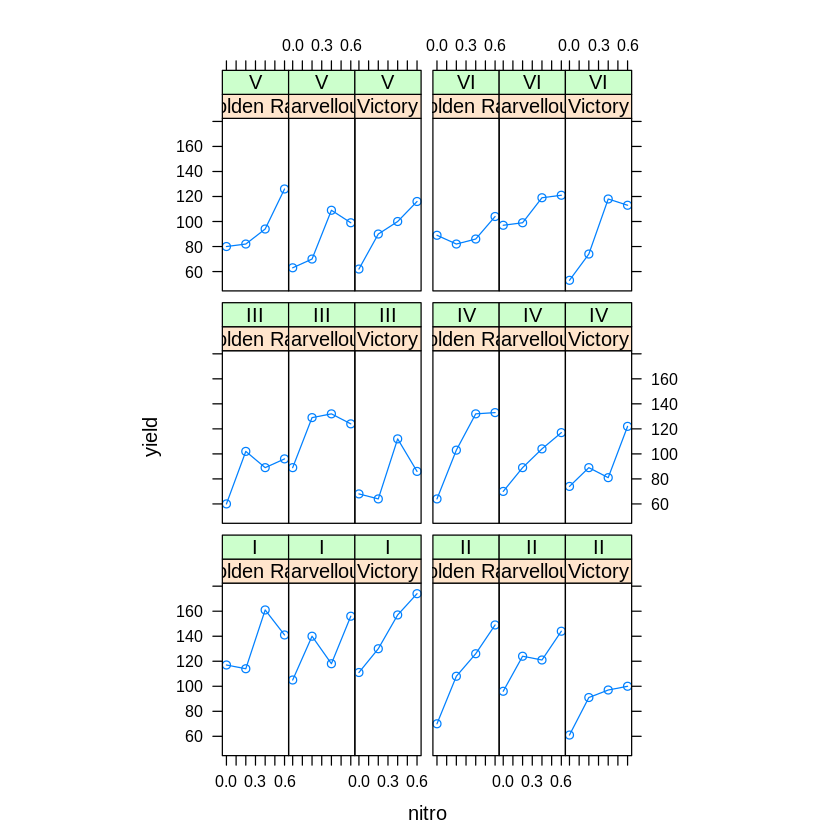

In [11]:
update(tp1.oats, aspect = "xy", layout = c(0, 18), 
       between = list(x = c(0, 0, 0.5), y = 0.5))

### GROUPED DISPLAYS

Like superposition, grouped displays effective at
forcing direct comparison of groups levels. Example
below is visualization of data from barley experiment
that combines grouping and conditioning to highlight
an anomaly in data not easily notices otherwise:

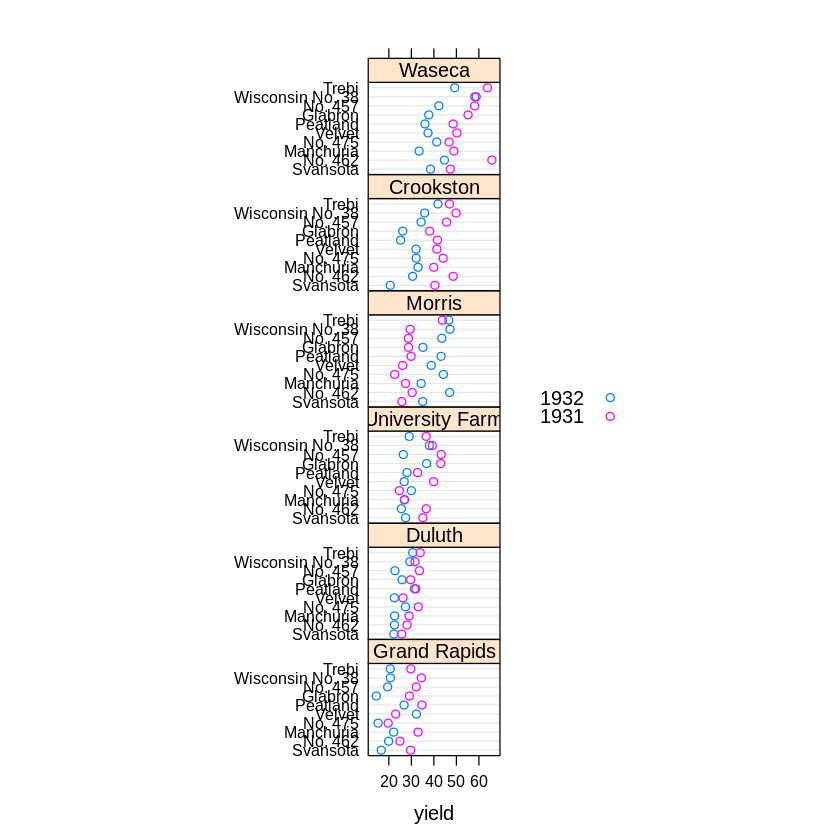

In [12]:
dotplot(variety ~ yield | site, barley, 
        layout = c(1, 6), aspect = c(0.7),
        groups = year, auto.key = list(space = 'right'))

Notice the reversed Morris data. Yield is plotted for
several varieties of barley, conditioned on six
sites. Different symbols differentiate year.

### ANNOTATION: CAPTIONS, LABELS, AND LEGENDS

Easiest way to add a legend to a grouped display is to
set draw.key = TRUE. Specifying auto.key as a list with
suitable components improves some of the minor tinkering
often necessary after draw.key = TRUE.

Can place legends on any of four sides of display (system
will allocate space), or inside display.

Can annotate by adding your own captions and labels. Here
Variety used as grouping variable, and a legend describes
its association between its levels and the corresponding
plotting characters.

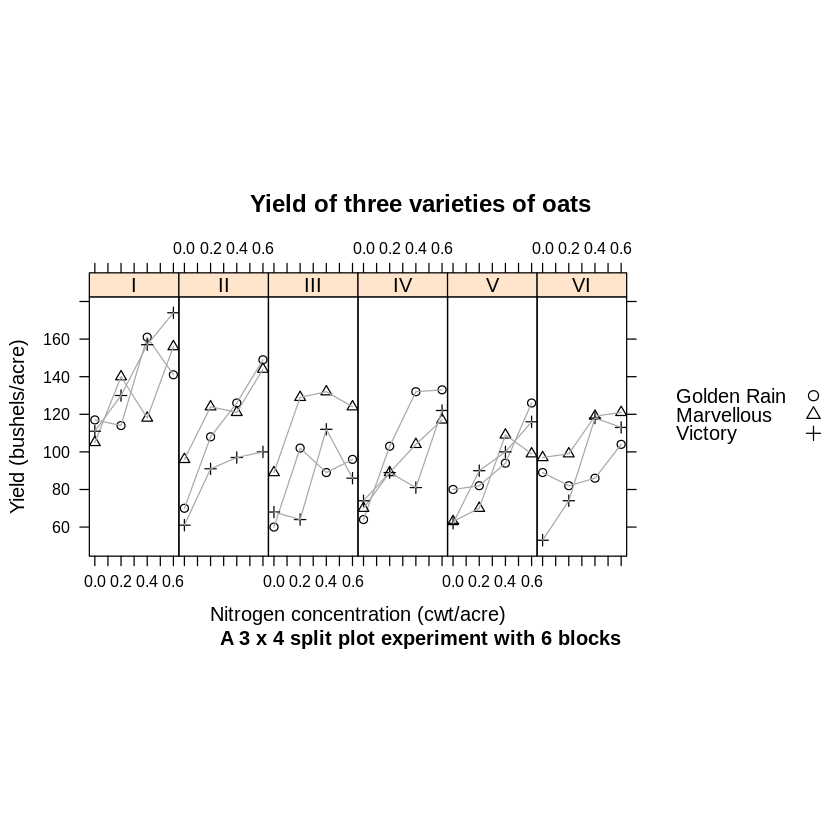

In [13]:
key.variety <- 
    list(space = "right", text = list(levels(Oats$Variety)),
         points = list(pch = 1:3, col = "black"))
xyplot(yield ~ nitro | Block, Oats, aspect = "xy", type = "o", 
       groups = Variety, key = key.variety, lty = 1, pch = 1:3, 
       col.line = "darkgrey", col.symbol = "black",
       xlab = "Nitrogen concentration (cwt/acre)",
       ylab = "Yield (bushels/acre)", 
       main = "Yield of three varieties of oats",
       sub = "A 3 x 4 split plot experiment with 6 blocks")

More on Legends p 26

The construction of legends is more involved than with
text labels because you can do more with lattice, have
more structure to them.

As we see in our last example, legends can be constructed
using the draw.key() function which can add an appropriate
legend to a plot by specifying a suitable list with key.

Previous example we use a column of text associated with levels
of Variety, and column of three different points.

But the values of these parameters are actually determined
when the xyplot() function is called so symbols and colors
may change (can be a problem). So in previous example, we
also explicitly specified the colors and symbols.

In most cases, a better approach is to use the 'auto.key'
argument (we will see this again later).

### GRAPHING THE DATA

Once you impose some preliminary structure on a trellis
display, there needs to still be a graphical encoding of the
data, rendering relevant axes (with tick marks and labels).
With multipanel displays, need additional elements describing 
each panel with the levels of conditioning variables (use 'strips'
which we discuss later).

Basic assumption is that graphical encoding of trellis design
will be repetitive, using the same procedure over and over
to visualize each packet of data.

### Scales and Axes

Single panel display can be draw once data rectangle and aspect
ratio are determined. For multi-panel displays, need intermediate
step of combining information from different packets. Then choose
common aspect ratio or can use arguments xlim and ylim for
explicit specification of the data rectangle.

Titanic dataset is a four-dimensional array of the fates of
2201 passengers, categorized by sex, age and class. We coerce 
it into a data frame. Here is first attempt:

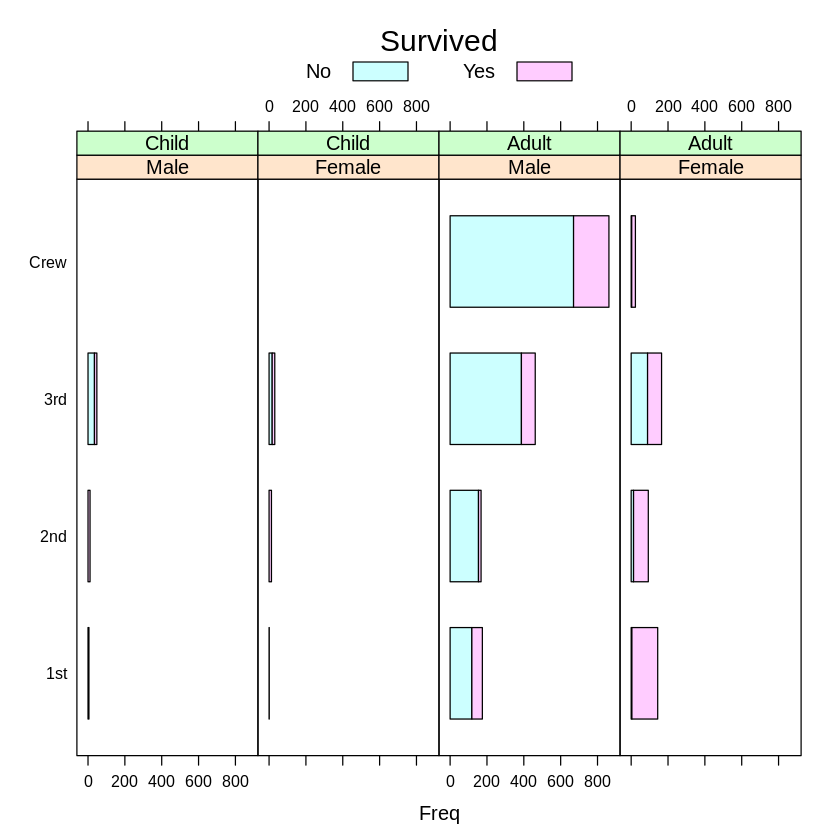

In [14]:
barchart(Class ~ Freq | Sex + Age, data = as.data.frame(Titanic), 
         groups = Survived, stack = TRUE, layout = c(4, 1),
         auto.key = list(title = "Survived", columns = 2))

Plot is dominated by the third panel (adult males) as heights
of bars encode absolute counts, and all panels have same limits.

All plot really tells us is that there are many more males
than females aboard (particularly among the crew, which is the
largest group). Also the "save the women and children first"
policy did not work as well for third-class passengers.

We see this second point even better in the next plot by
emphasizing proportions of survivors by allowing independent
horizontal scales for different panels:

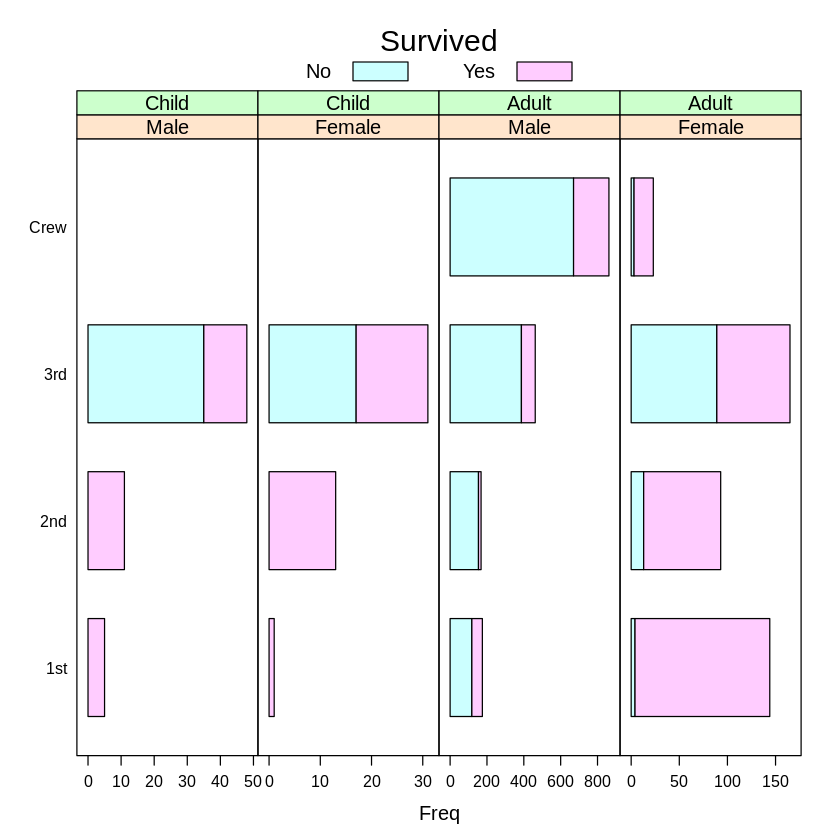

In [15]:
barchart(Class ~ Freq | Sex + Age, data = as.data.frame(Titanic), 
         groups = Survived, stack = TRUE, layout = c(4, 1), 
         auto.key = list(title = "Survived", columns = 2),
         scales = list(x = "free"))

### The Panel Function p. 30

Once rest of structure is in place (layout, data rectangles,
annotation), packets are plotted in the appropriate panel.
Actual plotting is done by the 'panel function' (specified as
the panel argument).

Are predefined default panel functions which can be customized.

Panel function are functions. Here we experiment with the panel
function, save the object in a variable and use the update
method to manipulate it further:

In [16]:
bc.titanic <- 
    barchart(Class ~ Freq | Sex + Age, as.data.frame(Titanic), 
             groups = Survived, stack = TRUE, layout = c(4, 1),
             auto.key = list(title = "Survived", columns = 2),
             scales = list(x = "free"))

which we can reproduce just by printing the object:

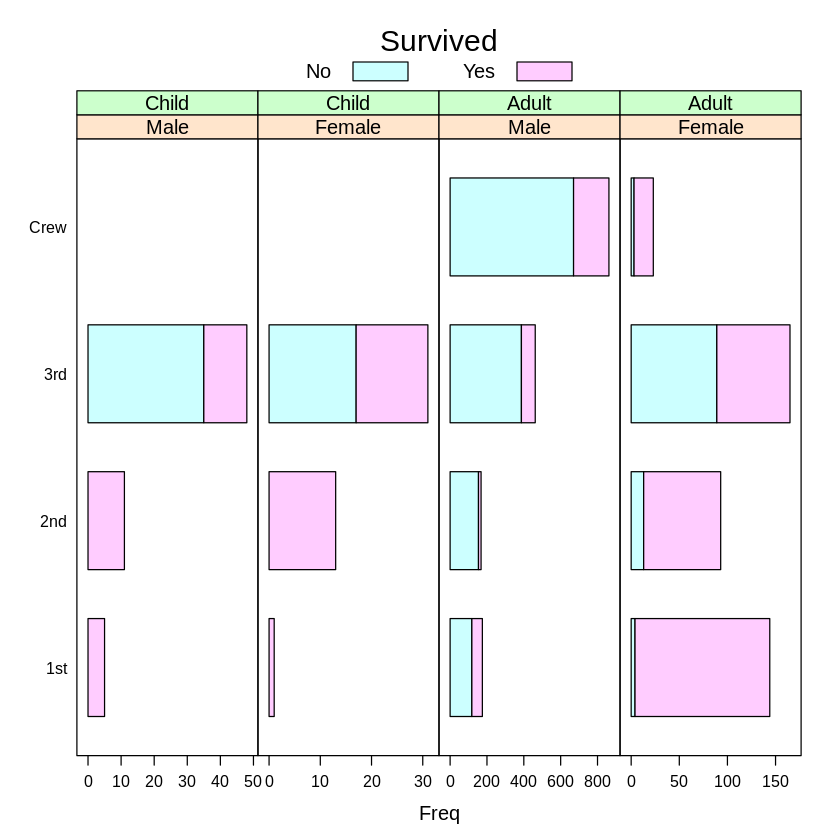

In [17]:
bc.titanic

Since default panel function for barchart is panel.barchart,
this is equivalent:

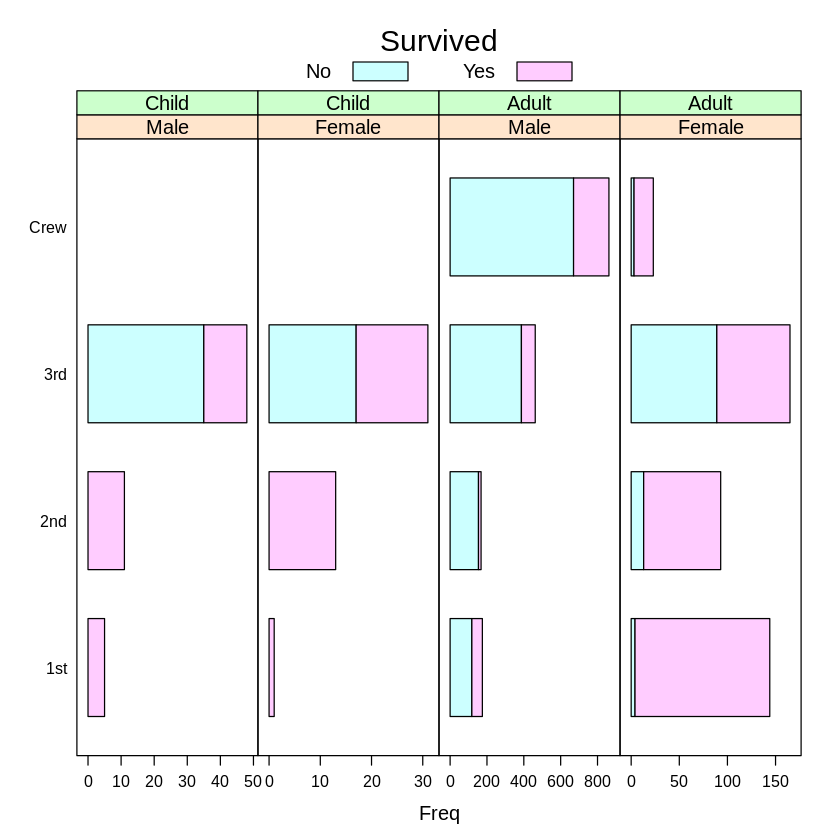

In [18]:
update(bc.titanic, panel=panel.barchart)

Note that call to update() produces an object of class "trellis"
but has not been assigned to a variable so it prints. Variable
`bc.titantic` is unchanged.

To be explicit that panel is a function, we could rewrite:

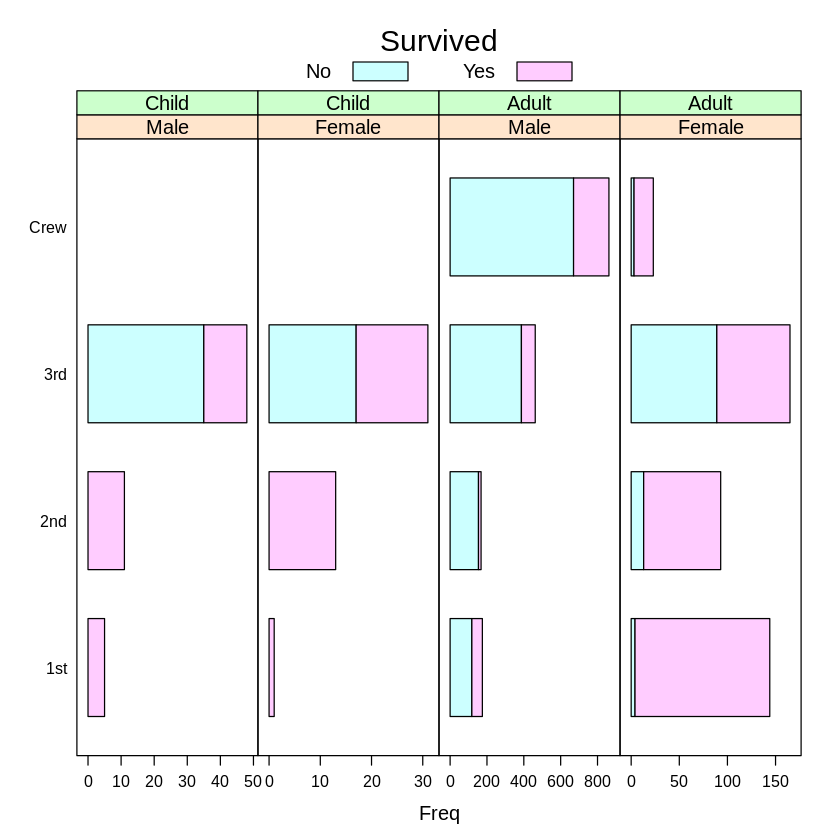

In [19]:
update(bc.titanic, 
       panel = function(...) {
           panel.barchart(...)
       })


Note an important feature of S language, the ... argument.
This syntax, used often by complex functions, is to capture
arguments actually meant for another function called by it,
without explicitly knowing what those arguments are. This is
useful in lattice calls, since want to add to a panel function,
not replace it.

For example, we add (faint) reference lines:

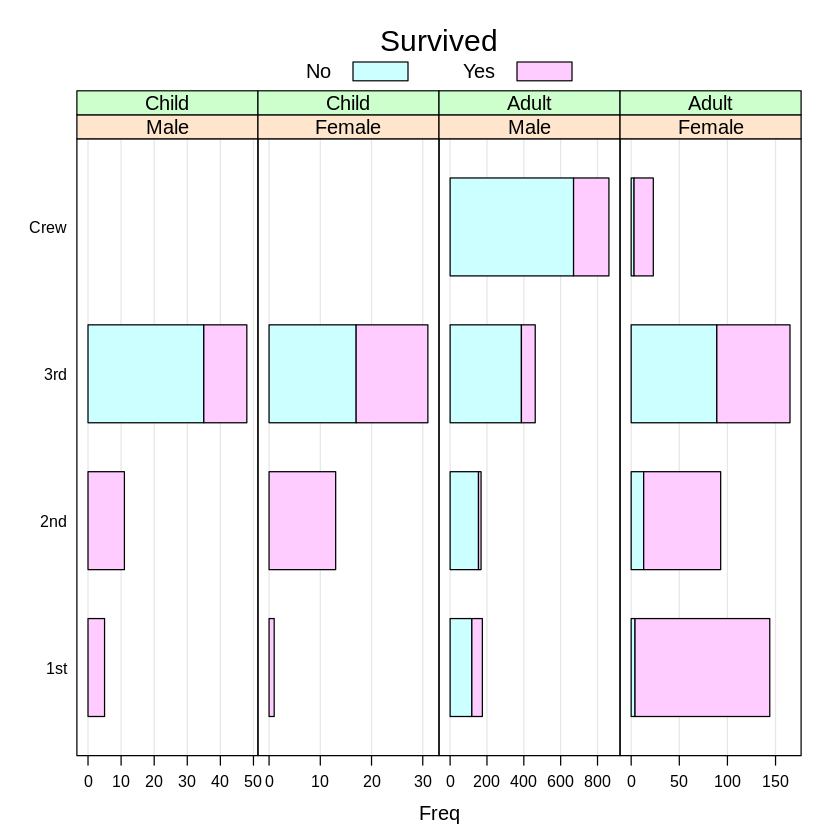

In [20]:
update(bc.titanic, 
       panel = function(...) {
         panel.grid(h = 0, v = -1)
         panel.barchart(...)
       })

With ... argument, we used panel.barchart() without even knowing
what arguments it accepts. Comment it out.

Suppose we want to remove black borders of bars:

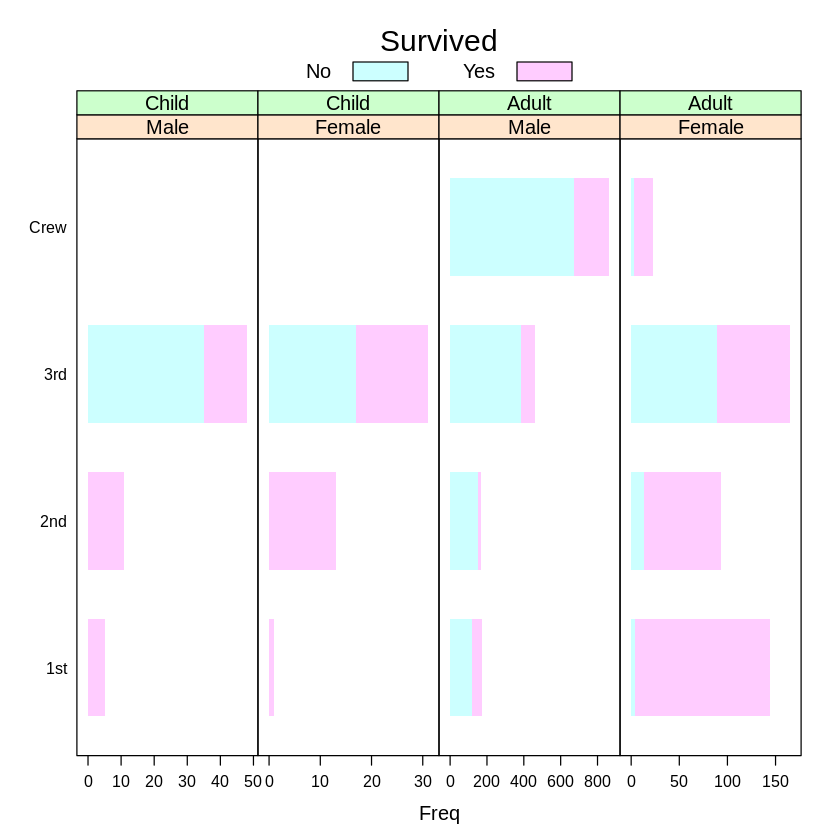

In [21]:
update(bc.titanic, 
       panel = function(..., border) {
           panel.barchart(..., border = "transparent")
       })

# FUNCTIONS AS R SCRIPT

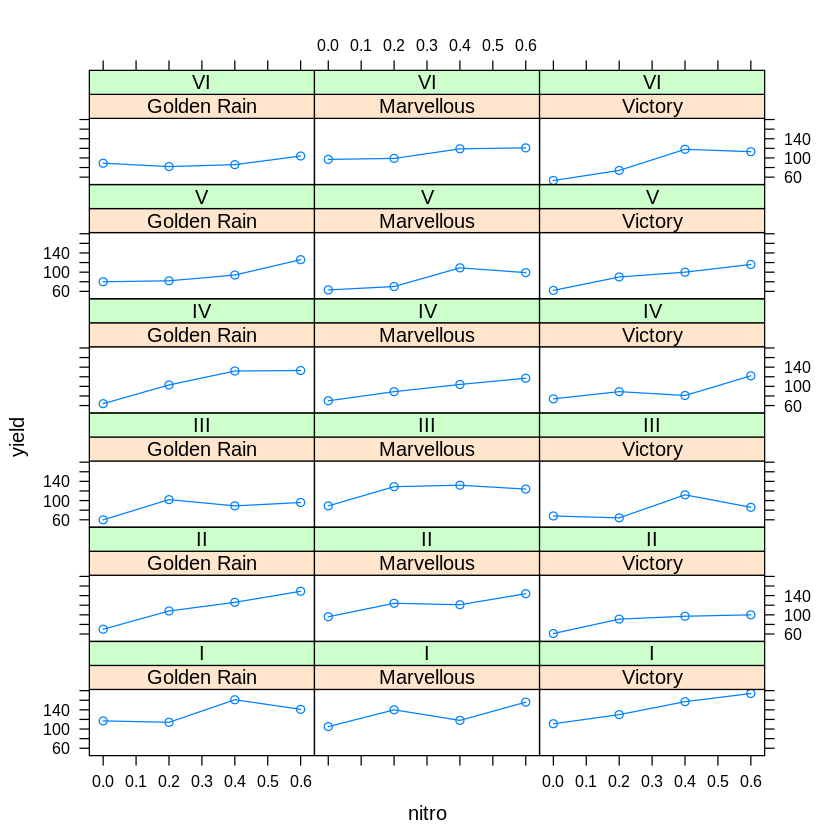

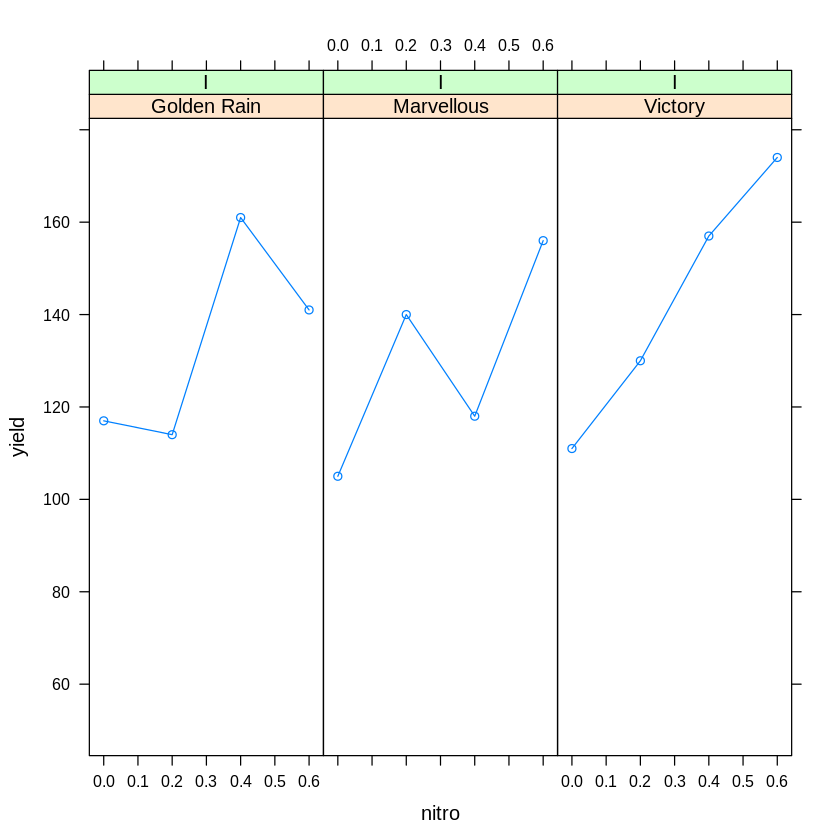

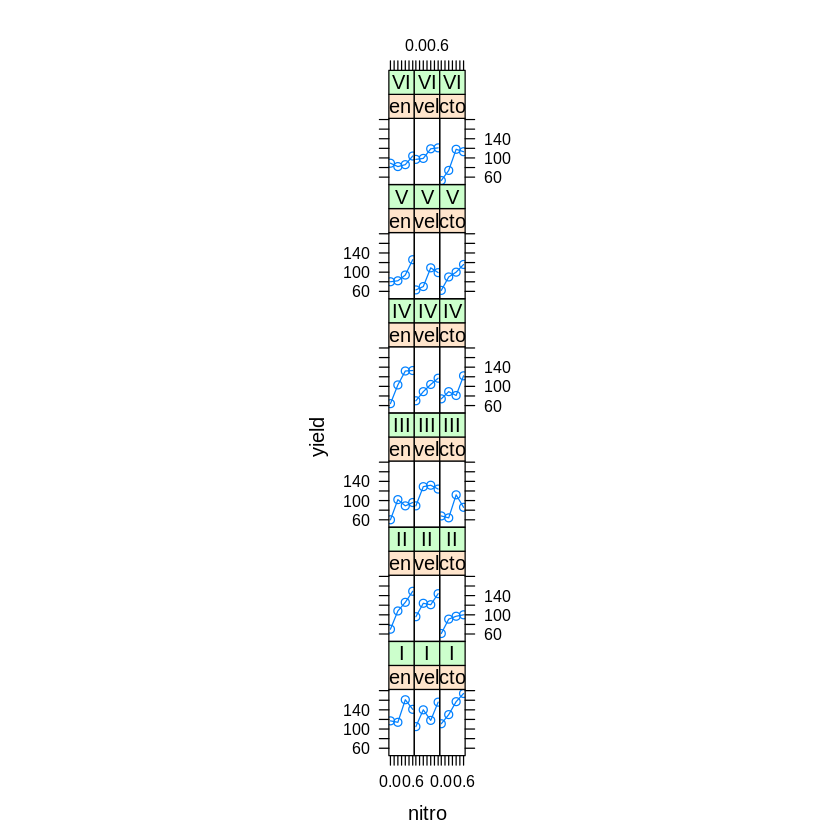

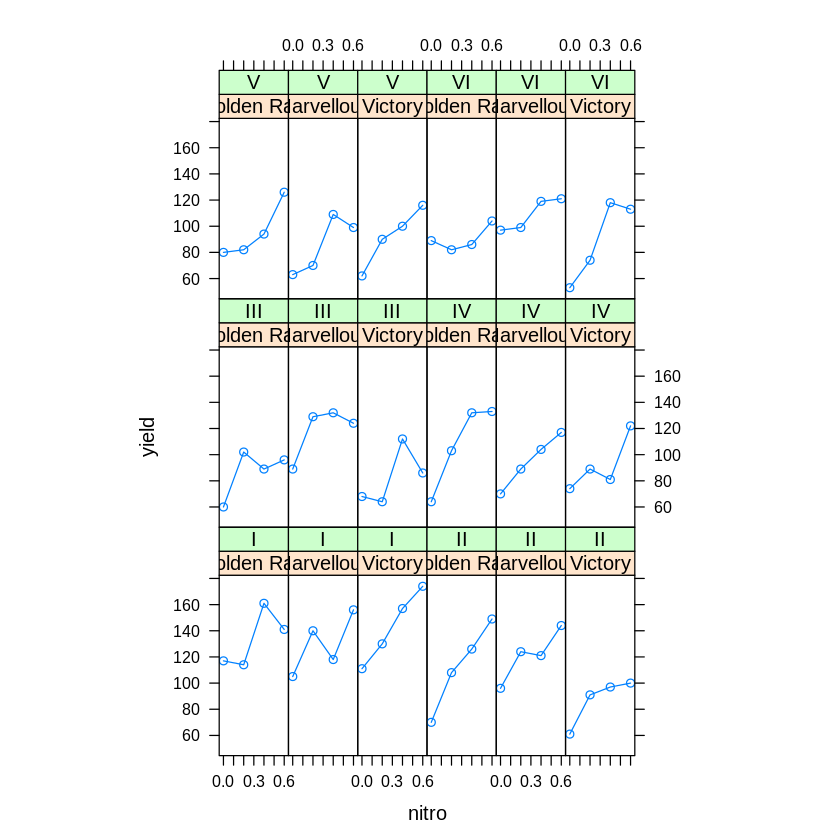

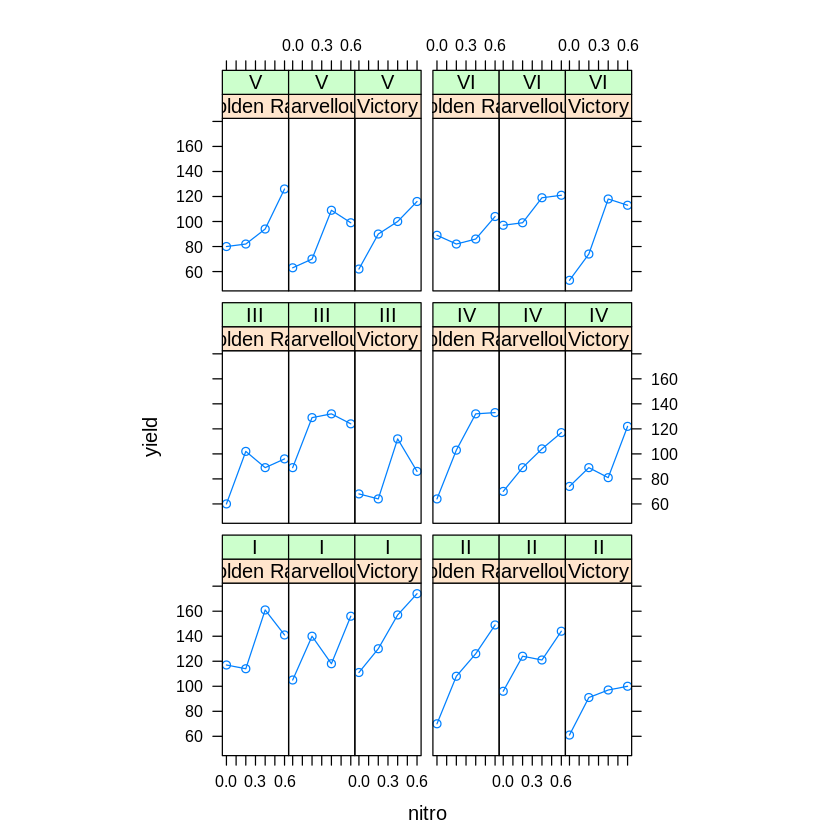

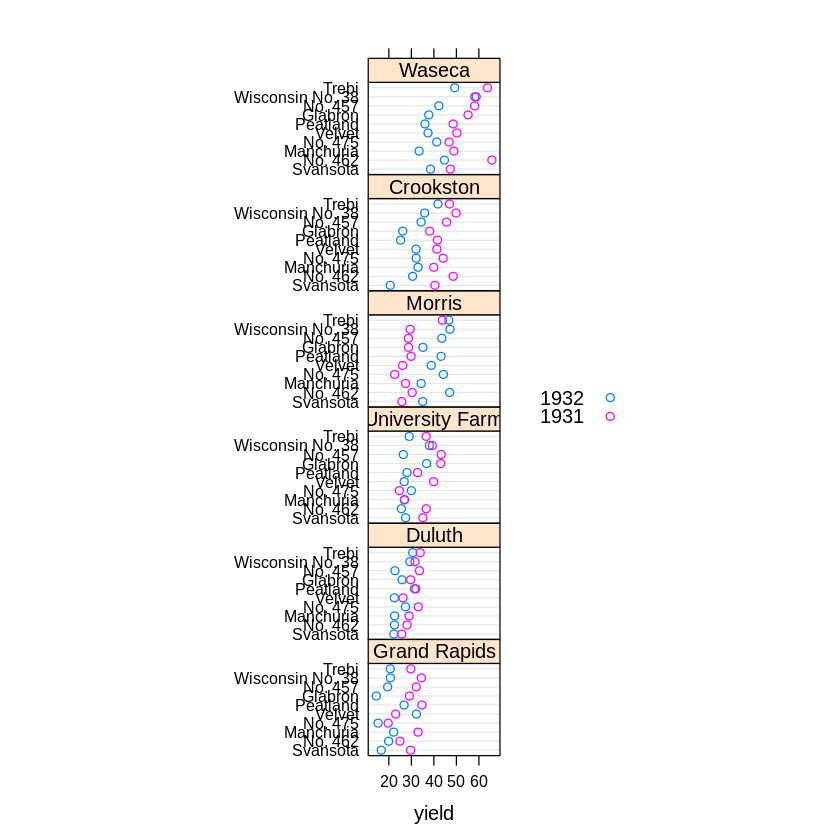

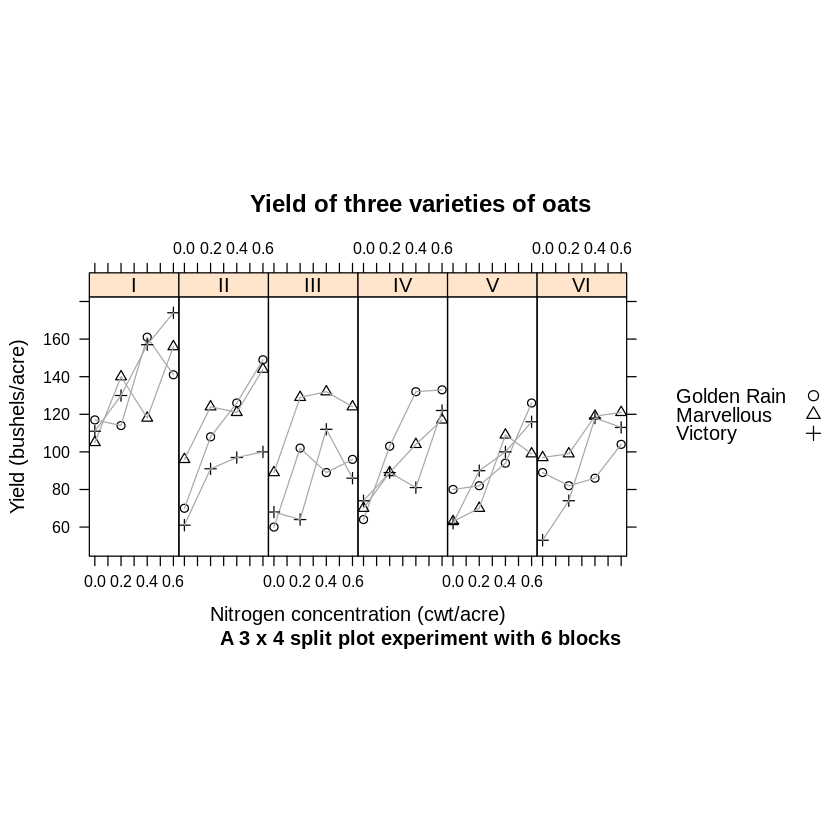

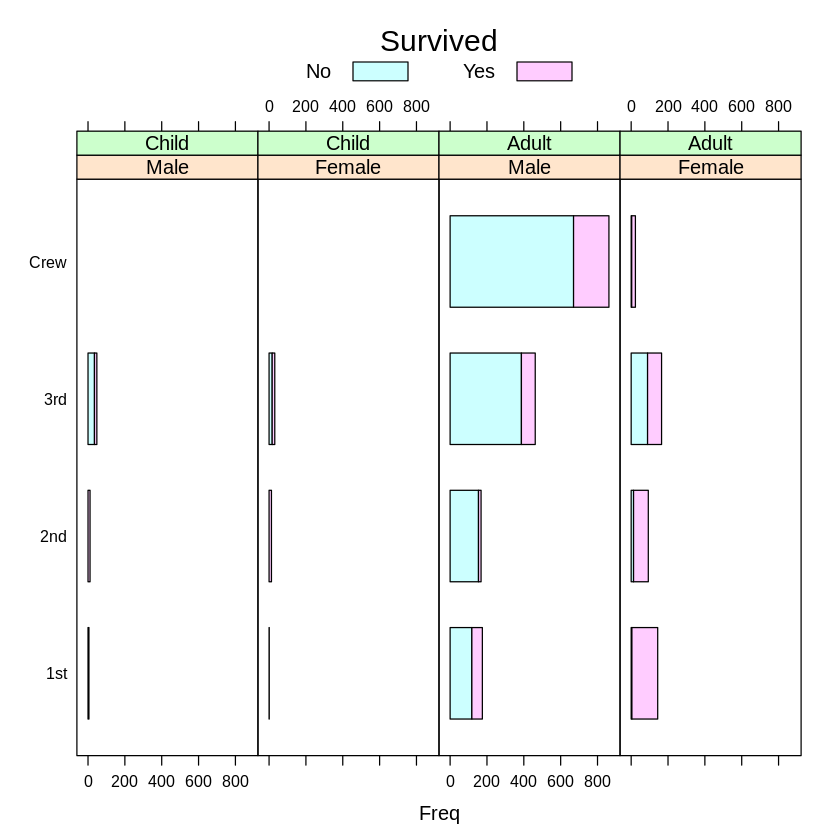

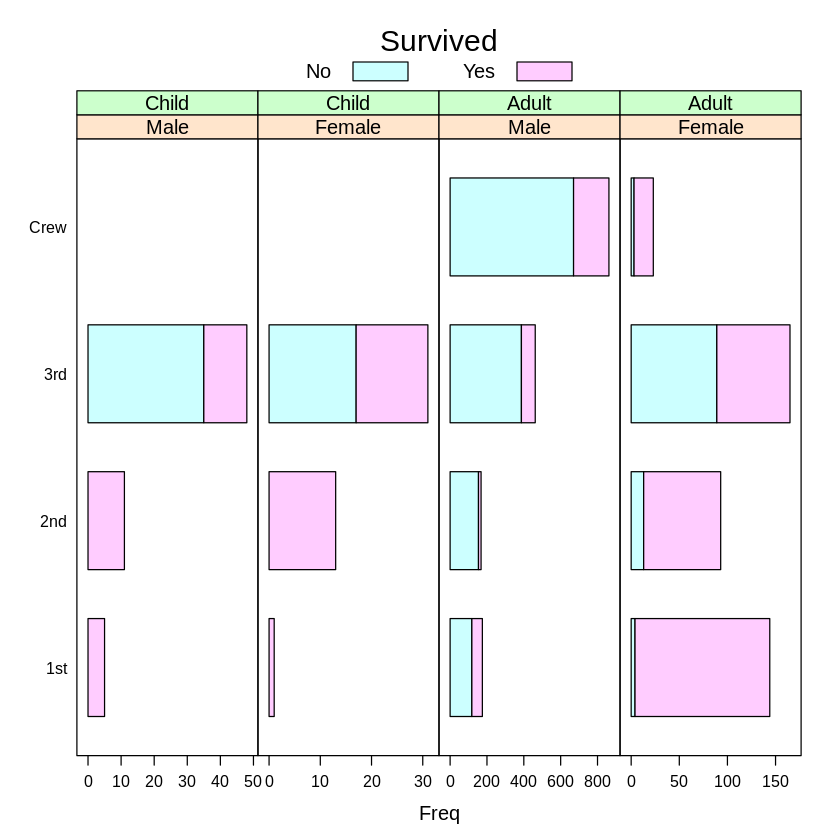

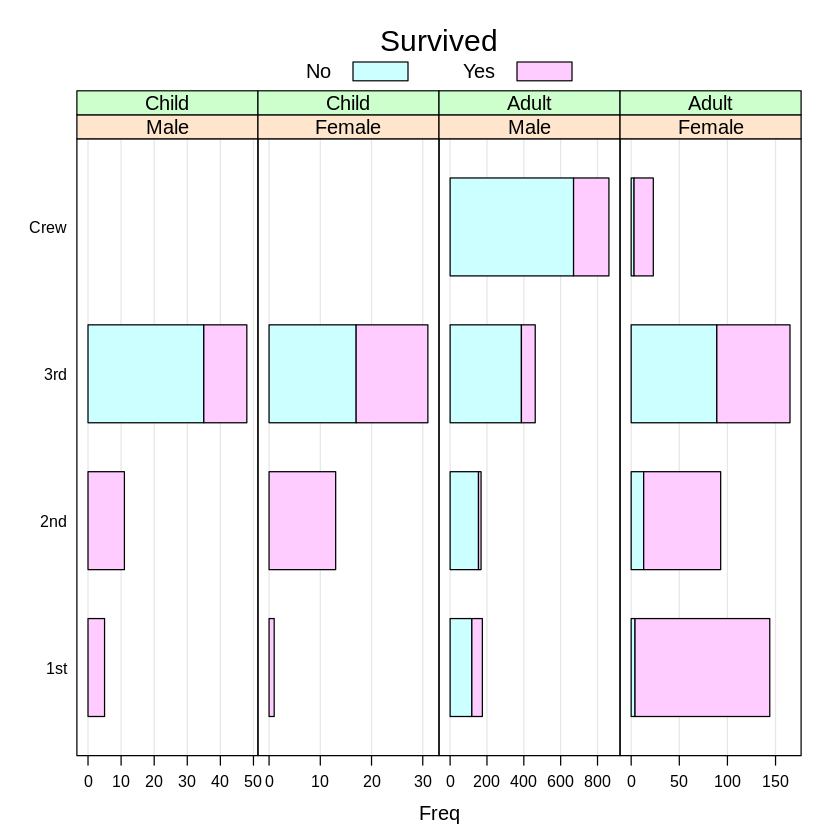

In [ ]:
Figure_2.1 <- function() {
  data(Oats, package = "MEMSS")
  tp1.oats <- 
    xyplot(yield ~ nitro | Variety + Block, data = Oats, type = 'o')
  print(tp1.oats)
}
Figure_2.1()

Figure_2.2 <- function() {
  data(Oats, package = "MEMSS")
  tp1.oats <- 
    xyplot(yield ~ nitro | Variety + Block, data = Oats, type = 'o')
  print(tp1.oats[, 1])
}
Figure_2.2()

Figure_2.3 <- function() {
  data(Oats, package = "MEMSS")
  tp1.oats <- 
    xyplot(yield ~ nitro | Variety + Block, data = Oats, type = 'o')
  update(tp1.oats, 
         aspect="xy")
}
Figure_2.3()

Figure_2.4 <- function() {
  data(Oats, package = "MEMSS")
  tp1.oats <- 
    xyplot(yield ~ nitro | Variety + Block, data = Oats, type = 'o')
  update(tp1.oats, aspect = "xy",
         layout = c(0, 18))
}
Figure_2.4()

Figure_2.5 <- function() {
  data(Oats, package = "MEMSS")
  tp1.oats <- 
    xyplot(yield ~ nitro | Variety + Block, data = Oats, type = 'o')
  update(tp1.oats, aspect = "xy", layout = c(0, 18), 
         between = list(x = c(0, 0, 0.5), y = 0.5))
}
Figure_2.5()

Figure_2.6 <- function() {
  dotplot(variety ~ yield | site, barley, 
          layout = c(1, 6), aspect = c(0.7),
          groups = year, auto.key = list(space = 'right'))
}
Figure_2.6()

Figure_2.7 <- function() {
  data(Oats, package = "MEMSS")
  key.variety <- 
    list(space = "right", text = list(levels(Oats$Variety)),
         points = list(pch = 1:3, col = "black"))
  xyplot(yield ~ nitro | Block, Oats, aspect = "xy", type = "o", 
         groups = Variety, key = key.variety, lty = 1, pch = 1:3, 
         col.line = "darkgrey", col.symbol = "black",
         xlab = "Nitrogen concentration (cwt/acre)",
         ylab = "Yield (bushels/acre)", 
         main = "Yield of three varieties of oats",
         sub = "A 3 x 4 split plot experiment with 6 blocks")
}
Figure_2.7()

Figure_2.8 <- function() {
  barchart(Class ~ Freq | Sex + Age, data = as.data.frame(Titanic), 
           groups = Survived, stack = TRUE, layout = c(4, 1),
           auto.key = list(title = "Survived", columns = 2))
}
Figure_2.8()

Figure_2.9 <- function() {
  barchart(Class ~ Freq | Sex + Age, data = as.data.frame(Titanic), 
           groups = Survived, stack = TRUE, layout = c(4, 1), 
           auto.key = list(title = "Survived", columns = 2),
           scales = list(x = "free"))
}
Figure_2.9()

Figure_2.10 <- function() {
  bc.titanic <- 
    barchart(Class ~ Freq | Sex + Age, as.data.frame(Titanic), 
             groups = Survived, stack = TRUE, layout = c(4, 1),
             auto.key = list(title = "Survived", columns = 2),
             scales = list(x = "free"))
  update(bc.titanic, 
         panel = function(...) {
           panel.grid(h = 0, v = -1)
           panel.barchart(...)
         })
}
Figure_2.10()

Figure_2.11 <- function() {
  bc.titanic <- 
    barchart(Class ~ Freq | Sex + Age, as.data.frame(Titanic), 
             groups = Survived, stack = TRUE, layout = c(4, 1),
             auto.key = list(title = "Survived", columns = 2),
             scales = list(x = "free"))
  update(bc.titanic, 
         panel = function(..., border) {
           panel.barchart(..., border = "transparent")
         })
}
Figure_2.11()